# Tensorly 

# http://tensorly.org/stable/home.html

   ### Minimal dependencies
   ### Tested and optimised
   ### Thorough documentation
   ### Pure Python
   ### NumPy, PyTorch, Tensorflow and MXnet backends
    
  ###  NumPy = http://www.numpy.org/
  
      fundamental package for scientific computing with Python
    
  ###  PyTorch = https://pytorch.org/    
  
      tensor and dynamic neural network 
    
  ###  MXnet =  https://mxnet.incubator.apache.org/
  
      library for deep learning
    
  ###  Tensorflow = https://www.tensorflow.org/
  
      open source machine learning framework


In [ ]:
!pip install tensorly

In [1]:
import tensorly 
import numpy as np

Using numpy backend.


### Tensore 3D  

In [3]:
T = np.zeros((3, 4, 2)) #sono le componenti del nostro tensore ovvero modo1, modo2, modo3
T[:, :, 0] = [[ 1,  4,  7, 10], [ 2,  5,  8, 11], [3,  6,  9, 12]] #la matrice associata al terzo indice (0) 
#è costituita da questi elementi
T[:, :, 1] = [[13, 16, 19, 22], [14, 17, 20, 23], [15, 18, 21, 24]]
T #visualizzata nel modo 2 e modo4

array([[[ 1., 13.],
        [ 4., 16.],
        [ 7., 19.],
        [10., 22.]],

       [[ 2., 14.],
        [ 5., 17.],
        [ 8., 20.],
        [11., 23.]],

       [[ 3., 15.],
        [ 6., 18.],
        [ 9., 21.],
        [12., 24.]]])

In [4]:
Tf=tensorly.fold((np.arange(24).reshape((3,8))+1)  , 0, (3,4,2)) #trasforma una matrice 3x8 in un tensore (folding)
Tf

array([[[ 1,  2],
        [ 3,  4],
        [ 5,  6],
        [ 7,  8]],

       [[ 9, 10],
        [11, 12],
        [13, 14],
        [15, 16]],

       [[17, 18],
        [19, 20],
        [21, 22],
        [23, 24]]])

In [6]:
Tf=tensorly.fold((np.arange(24).reshape((3,8),order='F')+1)  , 0, (3,4,2))
Tf

array([[[ 1,  4],
        [ 7, 10],
        [13, 16],
        [19, 22]],

       [[ 2,  5],
        [ 8, 11],
        [14, 17],
        [20, 23]],

       [[ 3,  6],
        [ 9, 12],
        [15, 18],
        [21, 24]]])

### unfolding modo 1

In [5]:
tensorly.to_numpy(tensorly.unfold(Tf,0))

array([[ 1,  2,  3,  4,  5,  6,  7,  8],
       [ 9, 10, 11, 12, 13, 14, 15, 16],
       [17, 18, 19, 20, 21, 22, 23, 24]])

### unfolding modo 2

In [7]:
(tensorly.unfold(Tf,1))

array([[ 1,  4,  2,  5,  3,  6],
       [ 7, 10,  8, 11,  9, 12],
       [13, 16, 14, 17, 15, 18],
       [19, 22, 20, 23, 21, 24]])

### unfolding modo 3

In [8]:
tensorly.to_numpy(tensorly.unfold(Tf,2))

array([[ 1,  7, 13, 19,  2,  8, 14, 20,  3,  9, 15, 21],
       [ 4, 10, 16, 22,  5, 11, 17, 23,  6, 12, 18, 24]])

### vectorization

In [9]:
tensorly.tensor_to_vec(Tf)

array([ 1,  4,  7, 10, 13, 16, 19, 22,  2,  5,  8, 11, 14, 17, 20, 23,  3,
        6,  9, 12, 15, 18, 21, 24])

### moltiplicazione con una matrice

In [11]:
U = np.array([ [1, 3, 5], [2,  4, 6]]) #matrice
A=tensorly.tenalg.mode_dot(T, U, mode=0) #faccio il prodotto del tensore T e della matrice U modo1
tensorly.unfold(A,2)

array([[ 22.,  49.,  76., 103.,  28.,  64., 100., 136.],
       [130., 157., 184., 211., 172., 208., 244., 280.]])

### Prodotto di Kronecker

In [13]:
import tensorly.tenalg
A = np.arange(4).reshape((2,2),order='F')+1
print('A=\n', A)
B = np.arange(9).reshape((3,3),order='F')+1
print('B=\n', B)
C = np.kron(A,B)
print('C=\n', C)
C = tensorly.tenalg.kronecker((A,B)) #è una matrice a blocchi, dove il blocco b è moltiplicato per uno dei blocchi di a
print('C=\n', C)

A=
 [[1 3]
 [2 4]]
B=
 [[1 4 7]
 [2 5 8]
 [3 6 9]]
C=
 [[ 1  4  7  3 12 21]
 [ 2  5  8  6 15 24]
 [ 3  6  9  9 18 27]
 [ 2  8 14  4 16 28]
 [ 4 10 16  8 20 32]
 [ 6 12 18 12 24 36]]
C=
 [[ 1  4  7  3 12 21]
 [ 2  5  8  6 15 24]
 [ 3  6  9  9 18 27]
 [ 2  8 14  4 16 28]
 [ 4 10 16  8 20 32]
 [ 6 12 18 12 24 36]]


### Prodotto di Hadamart

In [14]:
C=A*A #prodotto elemento per elemento della matrice A
print('C=\n',C)

C=
 [[ 1  9]
 [ 4 16]]


### prodotto di Kathri-Rao 

In [16]:
A = np.arange(4).reshape((2,2),order='F')+1
print('A=\n', A)
B = np.arange(6).reshape((3,2),order='F')+1
print('B=\n', B)

C=tensorly.tenalg.khatri_rao((A,B))
print('C=\n',C)

A=
 [[1 3]
 [2 4]]
B=
 [[1 4]
 [2 5]
 [3 6]]
C=
 [[ 1 12]
 [ 2 15]
 [ 3 18]
 [ 2 16]
 [ 4 20]
 [ 6 24]]


### Tensore di Kruskal

In [17]:
A=np.array([[1],[2],[3],[4]],np.float64) #iniziamo dalle matrici fattori
A

array([[1.],
       [2.],
       [3.],
       [4.]])

In [20]:
B=np.array([[1],[2]],np.float64)
B

array([[1.],
       [2.]])

In [21]:
C=np.array([[1],[2],[3]],np.float64)
C

array([[1.],
       [2.],
       [3.]])

In [22]:
factors=np.array([ A, B,C ]) #array di array
factors

array([array([[1.],
       [2.],
       [3.],
       [4.]]),
       array([[1.],
       [2.]]),
       array([[1.],
       [2.],
       [3.]])], dtype=object)

In [24]:
TK=tensorly.kruskal_tensor.kruskal_to_tensor(factors) #sto facendo diventare i 3 vettori un tensore

In [26]:
import tensorly.decomposition
factors_cp =tensorly.decomposition.parafac(TK,rank=1)#facciamo la decomposizione parallel factor di rango 1

In [27]:
[f.shape for f in factors_cp]

[(4, 1), (2, 1), (3, 1)]

In [28]:
factors_cp[0]

array([[ 8.36660027],
       [16.73320053],
       [25.0998008 ],
       [33.46640106]])

In [29]:
factors_cp[1]

array([[0.4472136 ],
       [0.89442719]])

In [30]:
factors_cp[2]

array([[0.26726124],
       [0.53452248],
       [0.80178373]])

In [31]:
factors_cp[0]/(factors_cp[0][0])

array([[1.],
       [2.],
       [3.],
       [4.]])

In [32]:
import tensorly.decomposition
factors_cp =tensorly.decomposition.non_negative_parafac(TK,rank=1)

In [33]:
factors_cp[0]

array([[ 8.36660027],
       [16.73320053],
       [25.0998008 ],
       [33.46640106]])

In [34]:
import tensorly.decomposition
factors_cp =tensorly.decomposition.parafac(TK,rank=1)

In [35]:
factors_cp

[array([[ 8.36660027],
        [16.73320053],
        [25.0998008 ],
        [33.46640106]]), array([[0.4472136 ],
        [0.89442719]]), array([[0.26726124],
        [0.53452248],
        [0.80178373]])]

In [36]:
[f.shape for f in factors_cp]

[(4, 1), (2, 1), (3, 1)]

In [37]:
factors_cp[1]

array([[0.4472136 ],
       [0.89442719]])

In [39]:
T_cp= tensorly.kruskal_tensor.kruskal_to_tensor(factors_cp ) #datii fattori mi ricalcolo il tensore

In [40]:
import tensorly.metrics
# mean squared error
#e vedo quanto dista il tensore ottenuto da quello originale
tensorly.metrics.regression.MSE(TK,T_cp)

1.9952634223851763e-30

In [42]:
# regularised  mean squared error
tensorly.metrics.regression.RMSE(TK,T_cp)

1.4125379366180494e-15

In [119]:
T_cp = tensorly.random.cp_tensor((20,40,30),4) #generiamo un altro tensore di kruskal random
T= tensorly.kruskal_tensor.kruskal_to_tensor(T_cp )
T.shape

(20, 40, 30)

In [120]:
rank=4
factors_cp =tensorly.decomposition.parafac(T,rank=rank)

In [121]:
T1= tensorly.kruskal_tensor.kruskal_to_tensor(factors_cp )
tensorly.metrics.regression.MSE(T1,T)

1.4900339361715208e-06

### Core Consistency Diagnostic

In [122]:
S=tensorly.tenalg.mode_dot(T, np.linalg.pinv(factors_cp[0]), mode=0)
S=tensorly.tenalg.mode_dot(S, np.linalg.pinv(factors_cp[1]), mode=1)
S=tensorly.tenalg.mode_dot(S, np.linalg.pinv(factors_cp[2]), mode=2)

### Tensore super diagonale

In [123]:
IS = np.zeros((rank, rank,rank))
for i in range(rank):
    IS[i,i,i]=1

In [124]:
tensorly.metrics.regression.MSE(S,IS)

0.0012512199371749765

In [125]:
100.*(1.- (tensorly.norm(S-IS)**2/tensorly.norm(IS)**2))

97.99804810052004

## Esempio
analysis of fluorescence spectra of Chemistry data.

In [130]:
import scipy.io
claus = scipy.io.loadmat('datasets/claus.mat')
claus

{'EmAx': array([[250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262,
         263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275,
         276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288,
         289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301,
         302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314,
         315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327,
         328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340,
         341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353,
         354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366,
         367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379,
         380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392,
         393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405,
         406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418,
         419, 420, 421, 422, 4

In [131]:
# X  = (sample, emission, excitation spectra)
X=claus['X']   
EmAx = claus['EmAx'][0]
AxAx = claus['ExAx'][0]
y = claus['y']
X.shape

(5, 201, 61)

Populating the interactive namespace from numpy and matplotlib


C:\Users\Carlotta\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


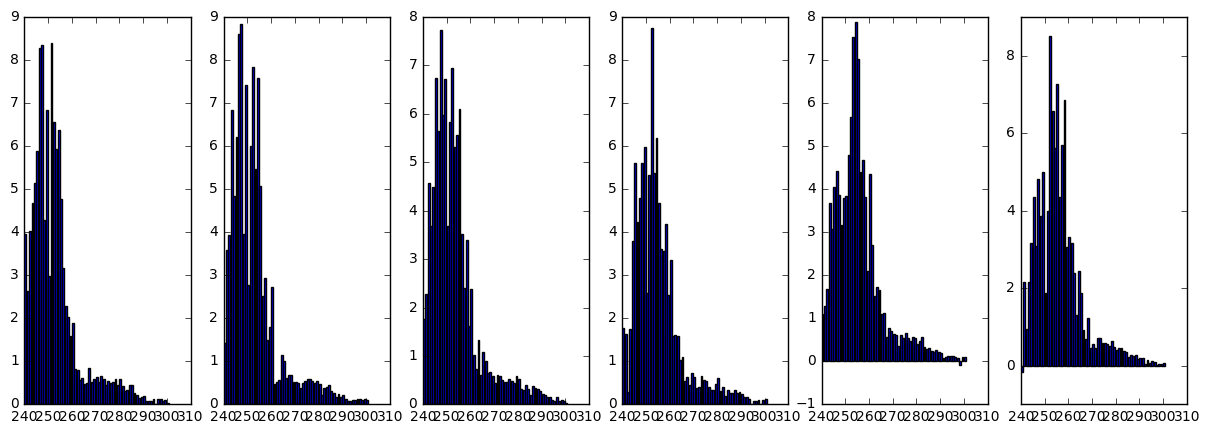

In [133]:
%pylab inline
ind=2;
x = range(X.shape[ind])
f = figure(figsize=(15,5));
count = 1
r = 6
for i in range(r):
    subplot(1,r,count)
    count += 1
    plt.bar(AxAx,X[4,i,:]) #l'asse delle x delle misurazioni chimiche
    #dal grafico non riesco a capire le percentuali delle sostanze

In [134]:
rango= 3
factors_cp =tensorly.decomposition.non_negative_parafac(X,rank=rango)

In [135]:
A=factors_cp[0]
B=factors_cp[1]
C=factors_cp[2]
A

array([[3.17137176e+04, 2.08281660e-01, 1.05903003e+01],
       [1.71253141e+02, 4.03837645e+00, 3.09145663e+03],
       [4.93103824e+02, 1.08834281e+04, 3.66136456e+01],
       [1.83441739e+04, 4.74162231e+03, 1.26125434e+03],
       [1.04239166e+04, 4.12008102e+03, 1.04217413e+03]])

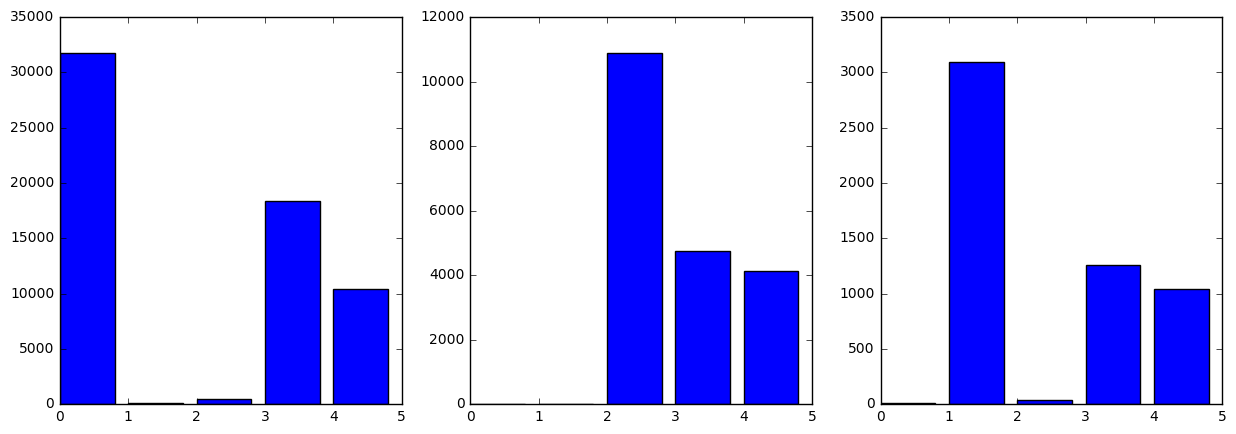

In [136]:
x = range(X.shape[0])
f = figure(figsize=(15,5));
count = 1
for i in range(rango):
     subplot(1,rango,count)
     count += 1
     plt.bar(x,A[:,i]) #grafico solo del fattore A
    #contiene 5 componenti del fattore di A e vediamo 3 colonne che sono le 3 sostanze che vogliamo trovare

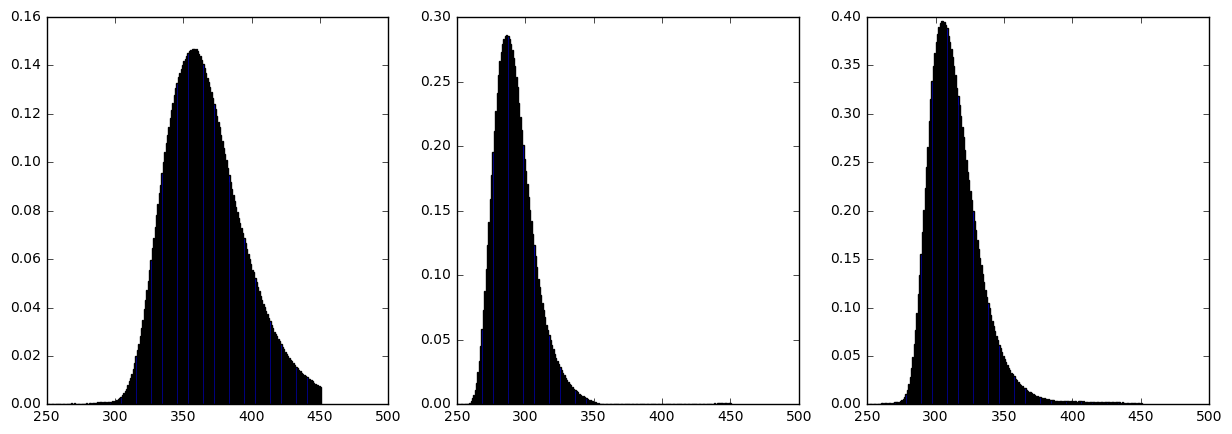

In [137]:
f = figure(figsize=(15,5));
count = 1
for i in range(rango):
     subplot(1,rango,count)
     count += 1
     plt.bar(EmAx,B[:,i])

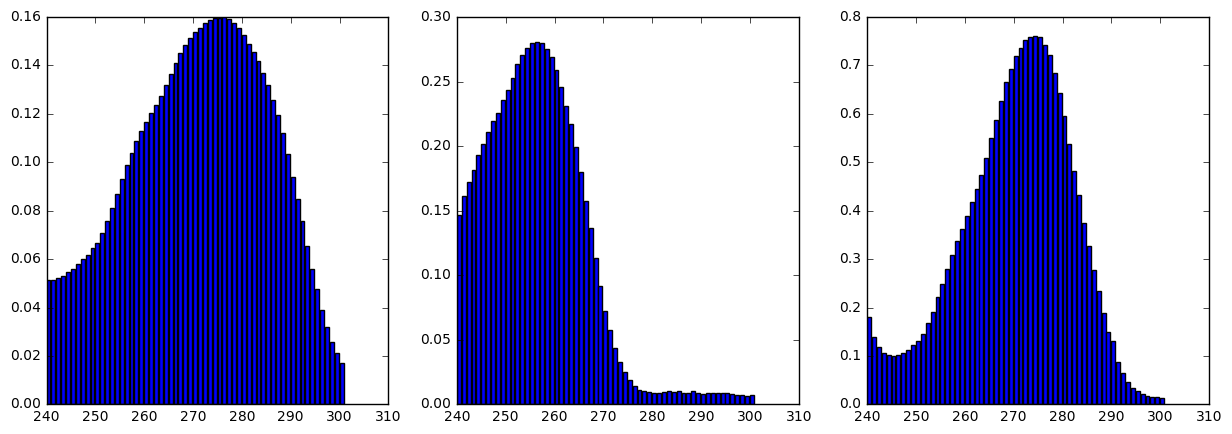

In [139]:
f = figure(figsize=(15,5));
count = 1
for i in range(rango):
     subplot(1,rango,count)
     count += 1
     plt.bar(AxAx,C[:,i])

Populating the interactive namespace from numpy and matplotlib


C:\Users\Carlotta\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


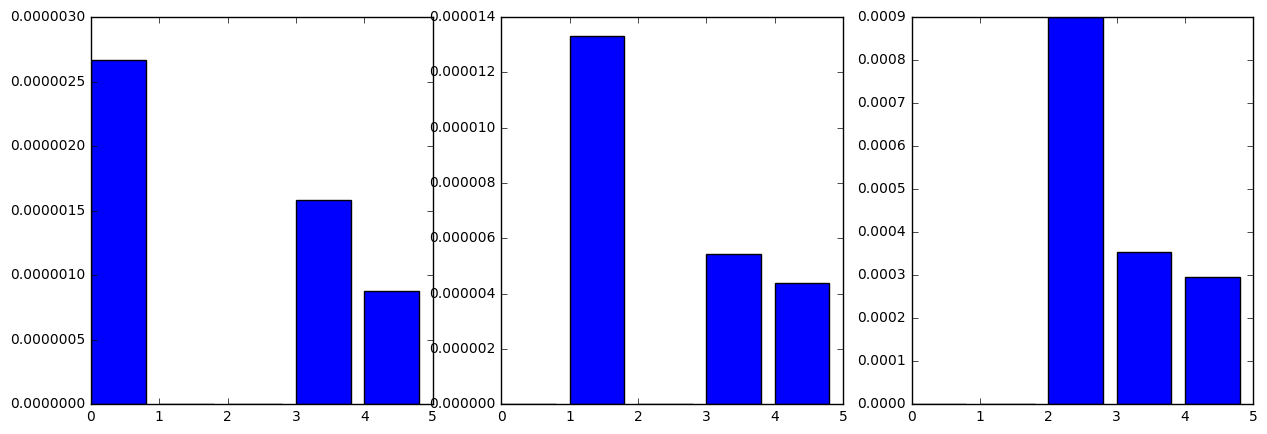

In [138]:
f = figure(figsize=(15,15));
%pylab inline
x = range(X.shape[0])
f = figure(figsize=(15,5));
count = 1
for i in range(3):
     subplot(1,3,count)
     count += 1
     plt.bar(x,y[:,i])#grafico di y che contiene le misurazionireali

In [140]:
# CCD
S=tensorly.tenalg.mode_dot(X, np.linalg.pinv(factors_cp[0]), mode=0)
S=tensorly.tenalg.mode_dot(S, np.linalg.pinv(factors_cp[1]), mode=1)
S=tensorly.tenalg.mode_dot(S, np.linalg.pinv(factors_cp[2]), mode=2)

IS = np.zeros((rango,rango,rango))
for i in range(rango):
    IS[i,i,i]=1
    
    
100.*(1.- (tensorly.norm(S-IS)**2/tensorly.norm(IS)**2))

97.97759624695578

### Esempio scriviamo un insieme di DIGIT in un tensore
Usiamo il database MNIST

In [142]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("datasets/MNIST/", one_hot=True)

Extracting datasets/MNIST/train-images-idx3-ubyte.gz
Extracting datasets/MNIST/train-labels-idx1-ubyte.gz
Extracting datasets/MNIST/t10k-images-idx3-ubyte.gz
Extracting datasets/MNIST/t10k-labels-idx1-ubyte.gz


Populating the interactive namespace from numpy and matplotlib


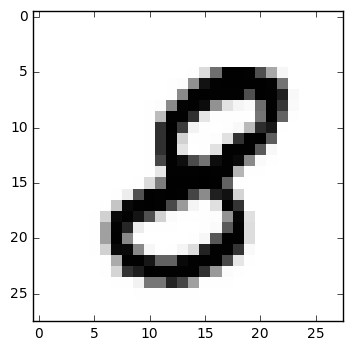

In [146]:
# check MNIST training images matrix data
#from matplotlib.pyplot import imshow
%pylab inline
sample_img = mnist.train.images[5].reshape(28, 28)
imshow(sample_img, cmap='Greys', interpolation='None')

In [147]:
mnist.train.labels.shape

(55000, 10)

In [148]:
mnist.train.labels[5]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

In [150]:
np.where(mnist.train.labels[5])[0][0] #vediamo dove si trova la label

8

In [151]:
D=numpy.asarray(mnist.train.images).reshape(55000,28,28)#prendo il db originale e lo memorizzo nel mio tensore

In [153]:
num=9;
Dnum=D[(mnist.train.labels[:,num])==1,:,:] #estraggo tutte le immagini che corrispondono alla label 9
#vogliamo usare il db per fare classificazione
Dnum.shape

(5454, 28, 28)

In [154]:
Dnum=Dnum[0:150,:,:]#scelgo un sottoinsieme di 150 elem

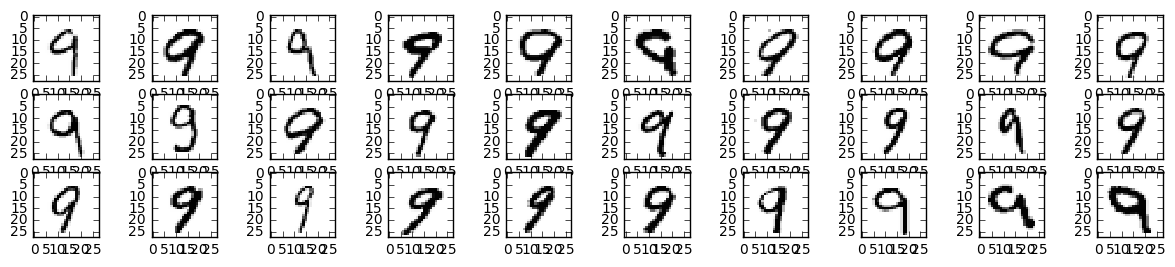

In [155]:
f = figure(figsize=(15,15));
count=1;
for i in range(30):
    imarray = Dnum[i,:,:]
    subplot(15,10,count)
    count += 1
    imshow(imarray, cmap='Greys', interpolation='None')

In [156]:
Dnum=np.transpose(Dnum)#facciamo la trasposta del tensore perchè tucker vuole lavorare sul numero delle immagini
#un un db 28x28x5450

In [158]:
import tensorly.decomposition
rango=3
# CP è una buona decomposizione ?
factors_cp =tensorly.decomposition.parafac(Dnum, rank=rango)#vediamo se la cp va bene con questo modello
#ovvero se resta qualche info con questo modello

In [160]:
#CCD
S=tensorly.tenalg.mode_dot(Dnum, np.linalg.pinv(factors_cp[0]), mode=0)
S=tensorly.tenalg.mode_dot(S, np.linalg.pinv(factors_cp[1]), mode=1)
S=tensorly.tenalg.mode_dot(S, np.linalg.pinv(factors_cp[2]), mode=2)
IS = np.zeros((rango,rango,rango))
for i in range(rango):
    IS[i,i,i]=1
    
    
100.*(1.- (tensorly.norm(S-IS)**2/tensorly.norm(IS)**2))#ho un numero negativo
#vuol dire che non va bene perchè perdo l'informazione
#perchè non ho una vera rappresentazione a 3 modi e non va bene la cp

-5607.980244759111

In [162]:
import tensorly.decomposition
#factors_cp =tensorly.decomposition.parafac(D, rank=10)
#[f.shape for f in factors_cp]
nbase=50
core, factors = tensorly.decomposition.tucker(Dnum,ranks=[28, 28, nbase])
#invece la tucker mi tiene conto dell'insieme (es la dimensione 28x28 non si può separare)

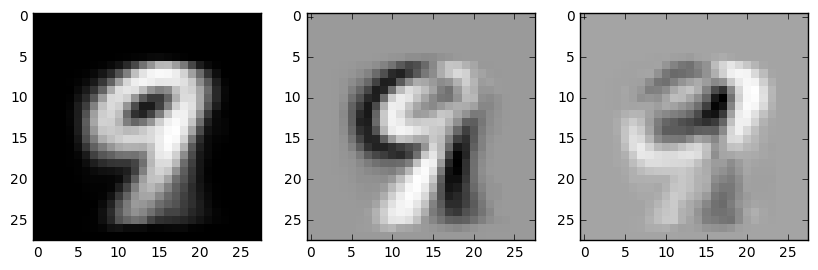

In [163]:
f = figure(figsize=(10,10));
for i in range(3):
   A=tensorly.tenalg.mode_dot(core[:,:,i], factors[0], mode=0)
   A=tensorly.tenalg.mode_dot(A,factors[1], mode=1)
   A = np.transpose(A)
   subplot(1,3,i+1)
   imshow(A, cmap='Greys', interpolation='None')

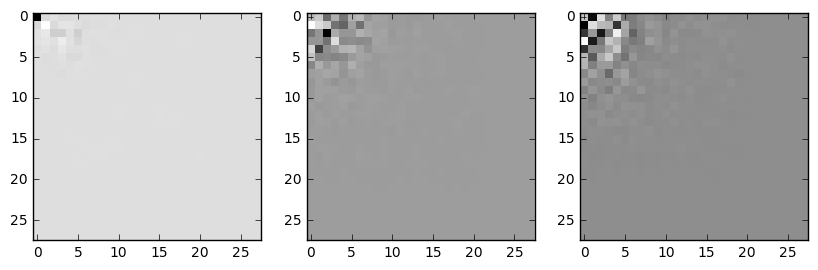

In [164]:
f = figure(figsize=(10,10));
for i in range(3):
    subplot(1,3,i+1)
    imshow(core[:,:,i], cmap='Greys', interpolation='None')

In [165]:
import numpy as np #implementiamo HOSVD 
DT=Dnum
U1, s1, V1 = np.linalg.svd(tensorly.unfold(DT,0))
U2, s2, V2 = np.linalg.svd(tensorly.unfold(DT,1))
U3, s3, V3 = np.linalg.svd(tensorly.unfold(DT,2))

In [166]:
S=tensorly.tenalg.mode_dot(DT, np.transpose(U1), mode=0)
S=tensorly.tenalg.mode_dot(S, np.transpose(U2), mode=1)
S=tensorly.tenalg.mode_dot(S, np.transpose(U3), mode=2)

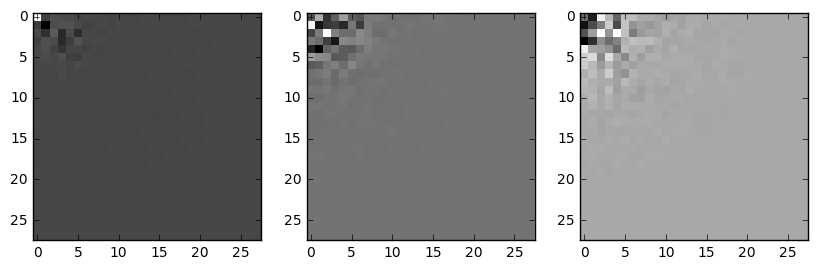

In [167]:
f = figure(figsize=(10,10));
for i in range(3):
    subplot(1,3,i+1)
    imshow(S[:,:,i], cmap='Greys', interpolation='None')

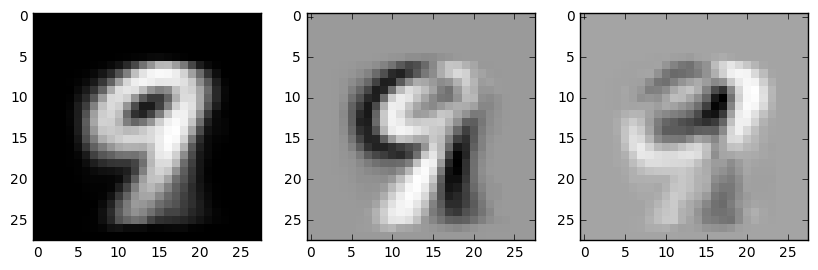

In [168]:
f = figure(figsize=(10,10));
for i in range(3):
   subplot(1,3,i+1)
   A1=tensorly.tenalg.mode_dot(S[:,:,i], U1, mode=0)
   A1=tensorly.tenalg.mode_dot(A1, U2, mode=1)
   A1 = np.transpose(A1)
   imshow(A1, cmap='Greys', interpolation='None')

In [169]:
#valori singolari modo 3
(size_im1,size_im2, num_im) = core.shape
sz =np.zeros(num_im)
for j in range(num_im):
   sz[j]= numpy.linalg.norm(core[:,:,j],'fro')

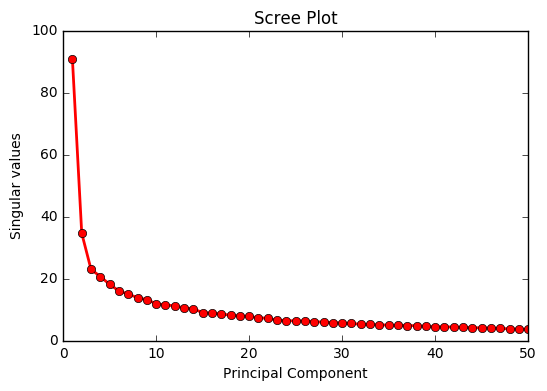

In [170]:
fig = plt.figure(figsize=(6,4))
sing_vals = np.arange(num_im) + 1
plt.plot(sing_vals, sz, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Singular values')



In [171]:
# percentuale di variazione dei digits
np.sum(sz[0:20]**2)/np.sum(sz**2)

0.9393744417160809

In [172]:
numpy.asarray(mnist.test.images).shape

(10000, 784)

In [173]:
DTest = numpy.asarray(mnist.test.images).reshape(10000,28,28)

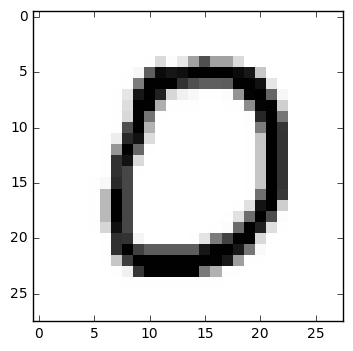

In [174]:
imshow(DTest[10,:,:], cmap='Greys', interpolation='None')

In [195]:
num=9;
DTest_num=DTest[(mnist.test.labels[:,num])==1,:,:]

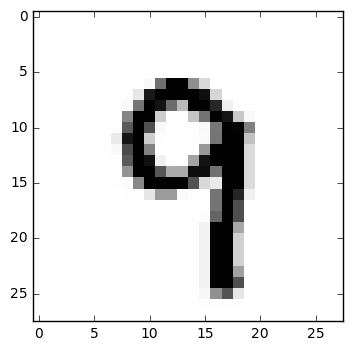

In [196]:
Z = DTest_num[50,:,:];
imshow(Z, cmap='Greys', interpolation='None')

In [197]:
nbases=S.shape[2] #individuo i coefficienti in modo da poter rappresentare tutti i 9 contenuti nel db (tipo una regressione)
z=np.zeros(nbases)
Za = np.zeros(Z.shape)
for i in range(20):
   A1=tensorly.tenalg.mode_dot(S[:,:,i], U1, mode=0)
   A1=tensorly.tenalg.mode_dot(A1, U2, mode=1)
   A1 = np.transpose(A1)
   z[i]=np.sum(Z*A1)/np.sum(A1*A1)
   Za = Za + z[i]*A1 
Za1 = np.zeros(Z.shape)
nbase=core.shape[2]
z1=np.zeros(nbase)
for i in range(20):
   A1=tensorly.tenalg.mode_dot(core[:,:,i], factors[0], mode=0)
   A1=tensorly.tenalg.mode_dot(A1, factors[1], mode=1)
   A1 = np.transpose(A1)
   z1[i]=np.sum(Z*A1)/np.sum(A1*A1)
   Za1 = Za1 + z1[i]*A1 

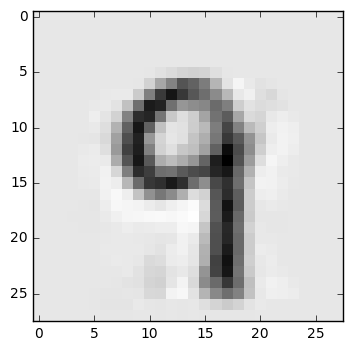

In [198]:
imshow(Za, cmap='Greys', interpolation='None')

In [199]:
100.*(1.- (tensorly.norm(Z-Za)**2/tensorly.norm(Z)**2))

88.34488281119827

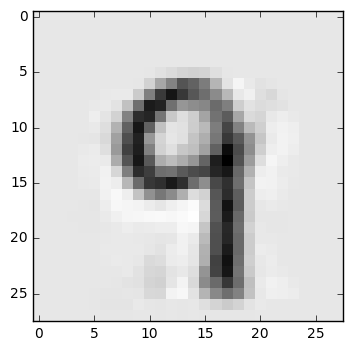

In [200]:
imshow(Za, cmap='Greys', interpolation='None')

In [201]:
100.*(1.- (tensorly.norm(Z-Za1)**2/tensorly.norm(Z)**2))

88.34486560259013